# Dimensionality reduction, visualization and quantification of the effect


We present different techniques for reduce the dimensionality of the dataset and study their effect on the process of creating a functional classifier (the loss of information during the process).

The **main goal** with this techniques is to reduce the size of the space we are working on keeping the most information possible in order to create a **functional classifier reducing the computation cost of the process**.

By Mario Martín, modify by Manuel Gijón on April 2024.

----

## PCA example

In [1]:
import numpy as np

from sklearn import decomposition
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [5]:
# Load the digits data from the pandas library appropiate module
digits = load_digits()
X = digits.data
y = digits.target

print(y[1])  # This is how the target variable is encoded, as integers from 0 to 9 corresponding with the 
             # true digit writen in the image
print(f"Number of samples: {X.shape[0]} - Number of features: {X.shape[1]}")
X[1]  # As we can see the image is encoded as a pain (1-dimension) vector of size 8x8

1
Number of samples: 1797 - Number of features: 64


array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

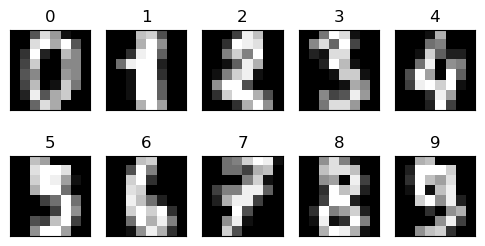

In [10]:
# Just for demostration purposes, let's plot some of the samples
nrows, ncols = 2, 5

plt.figure(figsize=(6,3))
plt.gray()

for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([]);
    plt.title(digits.target[i]);
    
plt.show()

Text(0.5, 1.0, 'Top 2 Principal Components')

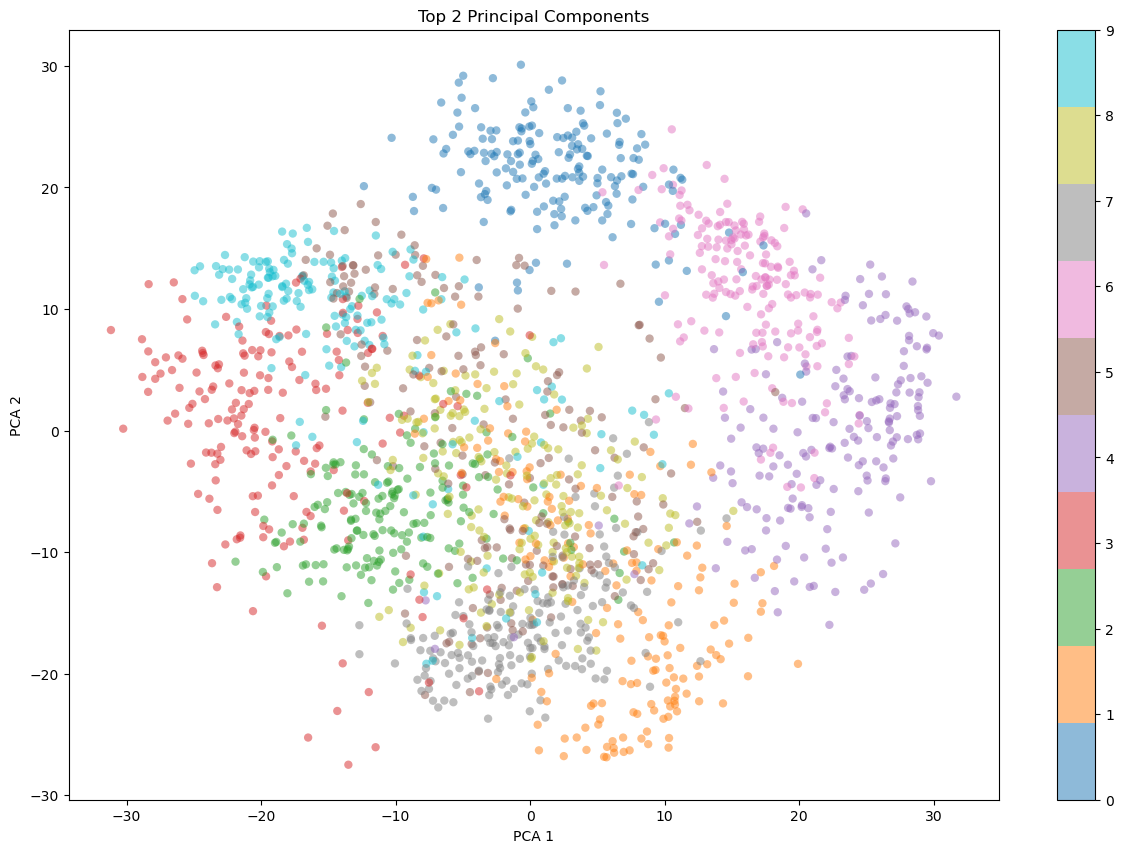

In [14]:
# Select only the first 2 principal components
pca = PCA(2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(digits.data)  # OBS: remark that this is an unsupervised method (does not known)
                                            # the real class that the sample belongs to

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize = (15, 10))
plt.scatter(
    projected[:, 0], 
    projected[:, 1],
    c = digits.target, 
    edgecolor = "none", 
    alpha = 0.5,
    cmap = "tab10"
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar();
plt.title("Top 2 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')  

# Could you create a linear object whose boundary separate "efficiently" the samples of different classes?

Text(0.5, 0.92, 'Top 3 Principal Components')

<Figure size 1500x1000 with 0 Axes>

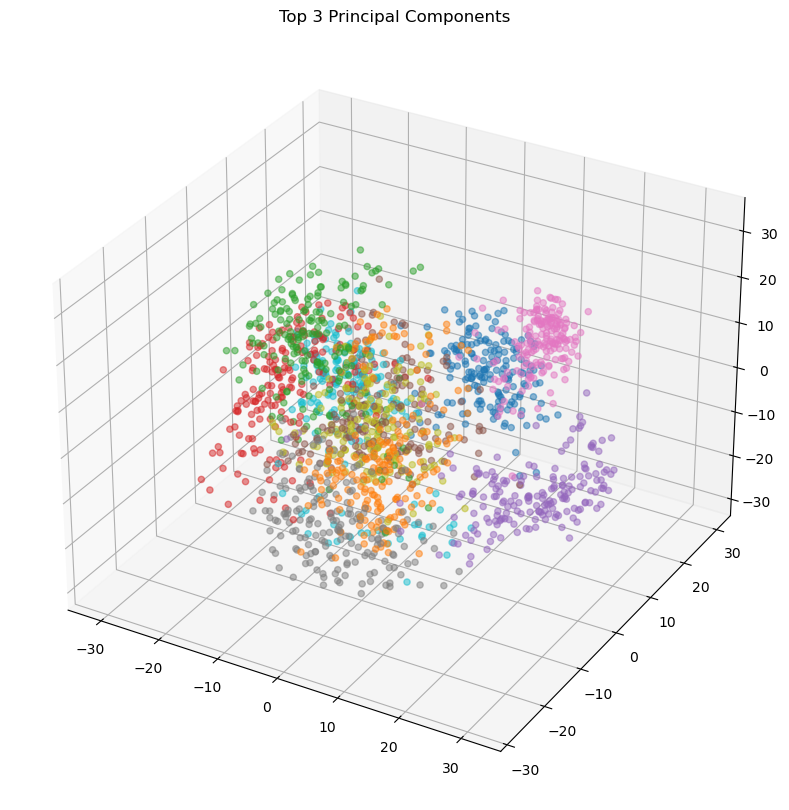

In [15]:
pca = PCA(3)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(digits.data)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2],
            c=digits.target,  alpha=0.5,cmap='tab10')
plt.title("Top 3 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')

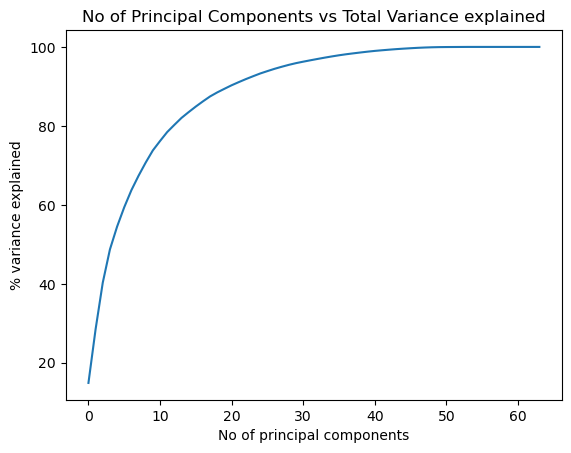

In [16]:
pca = PCA(64)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
varianceExp= pca.explained_variance_ratio_
# Compute the total sum of variance
totVarExp=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Plot the variance explained as a function of the number of principal components
plt.plot(totVarExp)
plt.xlabel('No of principal components')
plt.ylabel('% variance explained')
plt.title('No of Principal Components vs Total Variance explained')
plt.savefig('fig2.png', bbox_inches='tight')

## LDA

LDA is like a supervised version of PCA, that is, now using labels. Goal is to find smaller set of new axis, that are linear combinations of the original ones, maximizing separation between elements of different classes.

Text(0.5, 1.0, 'Top 2 Principal Components')

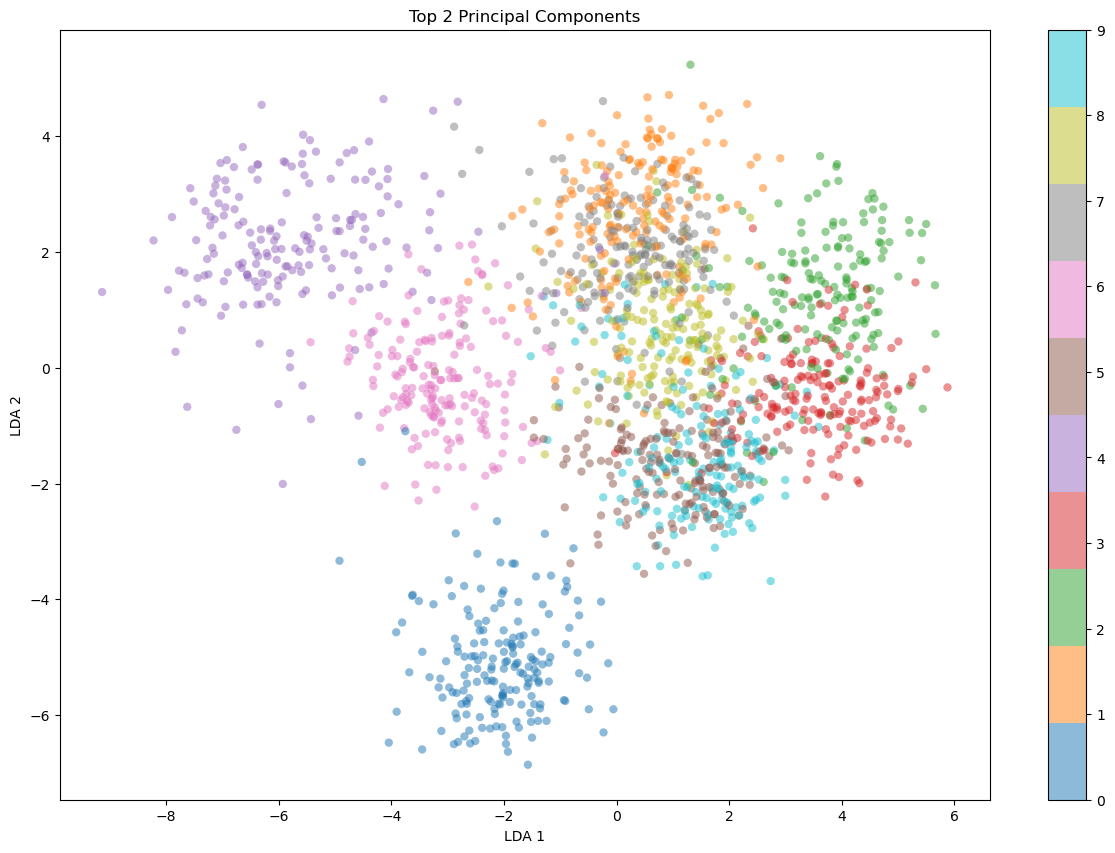

In [17]:
# Select only the first 2 principal components
lda = LinearDiscriminantAnalysis(n_components=2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = lda.fit_transform(digits.data, digits.target)  # OBS: note that in this case the algorithm is supervised

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize = (15, 10))
plt.scatter(
    projected[:, 0], 
    projected[:, 1],
    c = digits.target, 
    edgecolor = "none", 
    alpha = 0.5,
    cmap="tab10"
)
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.colorbar();
plt.title("Top 2 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')

Text(0.5, 0.92, 'Top 3 Principal Components')

<Figure size 1500x1000 with 0 Axes>

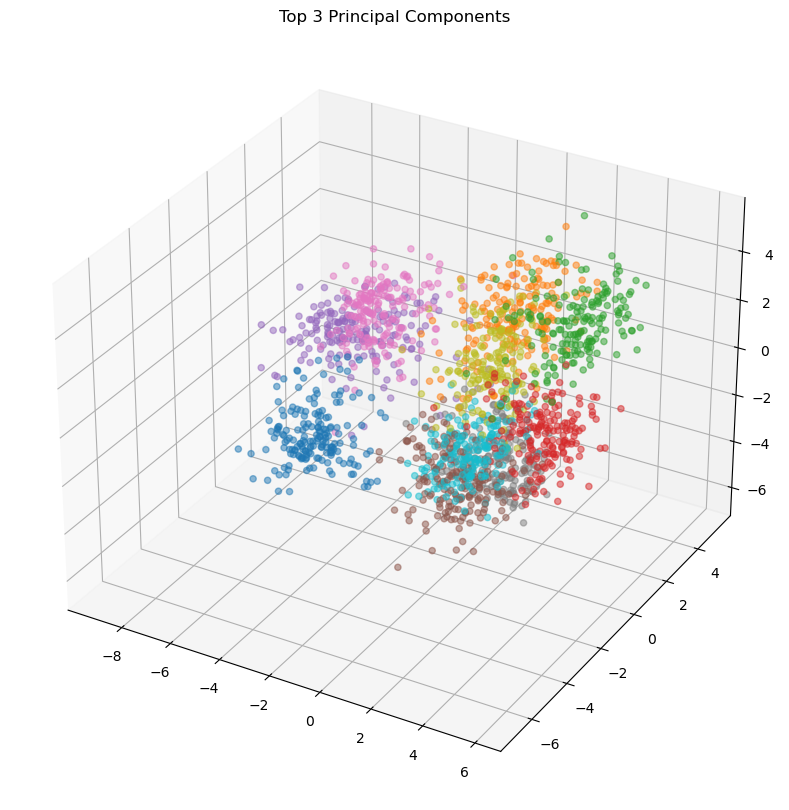

In [18]:
lda = LinearDiscriminantAnalysis(n_components=3)  # project from 64 to 2 dimensions

projected = lda.fit_transform(digits.data,digits.target)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2],
            c=digits.target, alpha=0.5,cmap='tab10')
plt.title("Top 3 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')

## t-SNE
t-Distributed Stochastic Neighbor Embedding


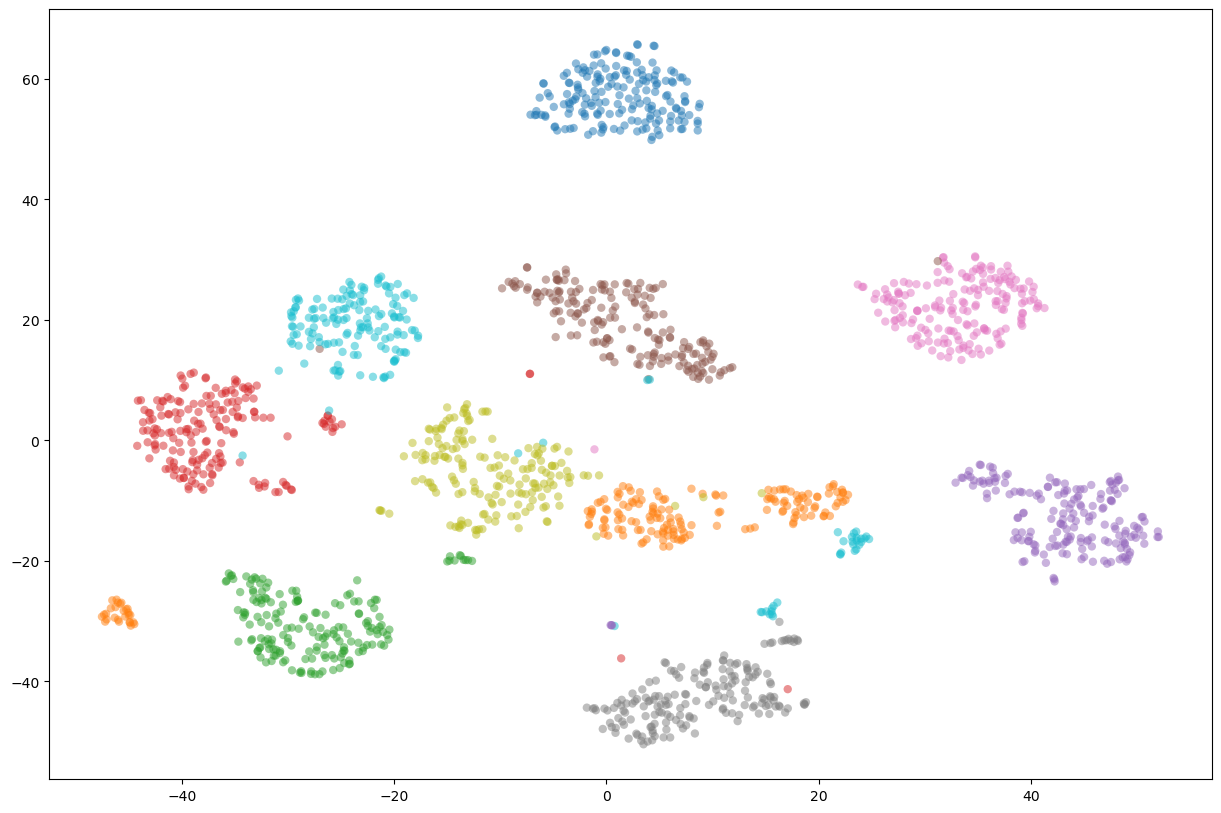

In [19]:
X_embedded = TSNE(n_components=2).fit_transform(digits.data)

plt.figure(figsize=(15, 10))
plt.scatter(
    X_embedded[:, 0], 
    X_embedded[:, 1],
    c = digits.target,
    edgecolor = "none", 
    alpha = 0.5,
    cmap = "tab10"
)

## UMAP

If not installed, do:

    conda install -c conda-forge umap-learn

or 

    pip install umap-learn


In [ ]:
import umap

X_embedded = umap.UMAP().fit_transform(digits.data)

plt.figure(figsize=(15, 10))
plt.scatter(
    X_embedded[:, 0], 
    X_embedded[:, 1],
    c = digits.target, 
    edgecolor = "none", 
    alpha = 0.8,
    cmap = "tab10"
)
plt.colorbar(
    boundaries = np.arange(11)-0.5
).set_ticks(np.arange(10))

In [ ]:
X_embedded.shape

In [ ]:
X_embedded = umap.UMAP(n_components=3).fit_transform(digits.data)
fig = ipv.pylab.figure()
scater = ipv.scatter(X_embedded[:, 0], X_embedded[:, 1],X_embedded[:, 2], color=colors, marker = 'sphere',edgecolor='none', alpha=0.5,cmap='tab10')
ipv.pylab.show()

# (Optional) Data identification

In [ ]:
from io import BytesIO
from PIL import Image
import pandas as pd
import base64

def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

X_embedded = TSNE(n_components=2).fit_transform(digits.data)

output_notebook()

digits_df = pd.DataFrame(X_embedded, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digits.target]
digits_df['image'] = list(map(embeddable_image, digits.images))

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in digits.target_names],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)


plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)